<a href="https://colab.research.google.com/github/Claye1/Claye1/blob/main/HOUSING_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#Installing Dependencies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/drive/MyDrive/COLAB NOTEBOOKS/Colab Notebooks/House_Rent_Dataset.csv')
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [4]:
#For Info on the General Dataset; displays the data type, titles/names of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
#To get a GENERAL QUICK OVERVIEW OF THE DATA SET (.T transposes the Table, see next one for the difference)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


In [6]:
#Compar Table to the one above for the difference
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [7]:
#To identify MISSING VALUES in the DATASET
df.isnull().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


In [8]:
#To identify UNIQUE VALUES in the colums
df.nunique()

,0
Posted On,81
BHK,6
Rent,243
Size,615
Floor,480
Area Type,3
Area Locality,2235
City,6
Furnishing Status,3
Tenant Preferred,3


In [9]:
#FINDING OUT THE LARGEST
df.sort_values(by="Rent",ascending=False).head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1837,2022-06-08,3,3500000,2500,4 out of 4,Carpet Area,Marathahalli,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent
1001,2022-06-01,4,1200000,5000,4 out of 15,Carpet Area,Juhu,Mumbai,Semi-Furnished,Bachelors/Family,4,Contact Agent
827,2022-05-18,4,1000000,3064,18 out of 45,Carpet Area,"Raheja Artesia, Worli",Mumbai,Semi-Furnished,Family,4,Contact Agent
1329,2022-06-23,4,850000,3200,2 out of 4,Carpet Area,Breach Candy,Mumbai,Furnished,Bachelors/Family,4,Contact Agent
1459,2022-06-27,4,700000,3200,24 out of 24,Carpet Area,"Lady Ratan Tower, Worli",Mumbai,Furnished,Bachelors/Family,4,Contact Agent
1484,2022-07-07,4,680000,1962,18 out of 20,Carpet Area,Khar West,Mumbai,Semi-Furnished,Bachelors/Family,5,Contact Agent
1319,2022-05-31,5,650000,3000,8 out of 10,Carpet Area,Khar West,Mumbai,Semi-Furnished,Bachelors/Family,5,Contact Agent
726,2022-06-20,4,600000,2500,12 out of 13,Carpet Area,"Mount Marry, Bandra West",Mumbai,Semi-Furnished,Bachelors/Family,4,Contact Agent
1384,2022-05-27,5,600000,4500,7 out of 20,Carpet Area,Bandra West,Mumbai,Furnished,Bachelors,5,Contact Agent
792,2022-06-13,5,600000,3200,10 out of 16,Carpet Area,Bandra East,Mumbai,Semi-Furnished,Bachelors/Family,5,Contact Agent


In [11]:
#CORRELATION of the DATASET
# Excluding non-numeric columns from correlation calculation
numerical_df = df.select_dtypes(include=['number'])  # Select only numerical columns
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

df  # Display the original DataFrame

               BHK      Rent      Size  Bathroom
BHK       1.000000  0.369718  0.716145  0.794885
Rent      0.369718  1.000000  0.413551  0.441215
Size      0.716145  0.413551  1.000000  0.740703
Bathroom  0.794885  0.441215  0.740703  1.000000


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


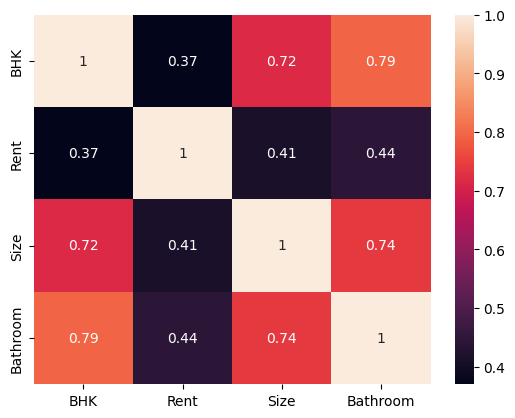

In [13]:
#To Visualize
# Excluding non-numeric columns from correlation calculation
numerical_df = df.select_dtypes(include=['number'])  # Select only numerical columns
correlation_matrix = numerical_df.corr()  # Calculate correlation for numerical columns only
sns.heatmap(correlation_matrix, annot=True)  # Use the numerical correlation matrix for the heatmap
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

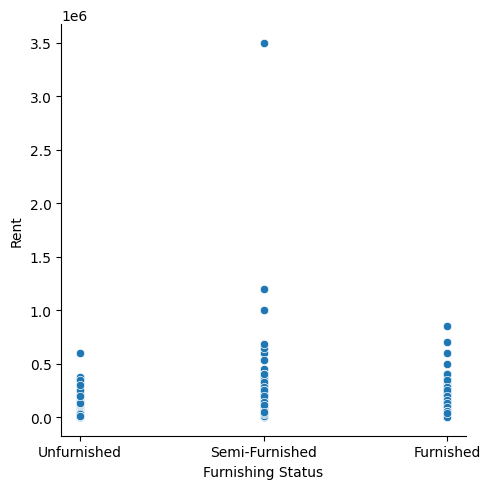

In [14]:
#CHECKING FOR THE RELATIONSHIP BETWEEN THE VARIABLES #VISUALIZATION cont'd
sns.relplot(x='Furnishing Status',y='Rent',data=df)


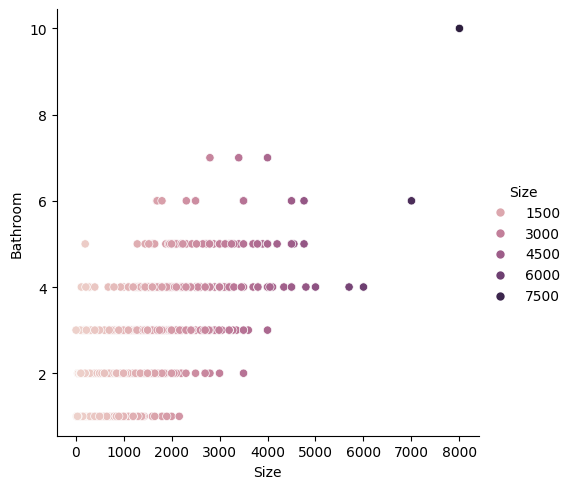

In [15]:
#Add Colour to datset / variables
sns.relplot(x='Size',y='Bathroom',hue='Size', data=df)

In [17]:
#MODEL - import Linear Regression from SK LEARN
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
train = df.drop(['Posted On','City'], axis=1)
test = df['Rent']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.2,random_state=2)

In [20]:
reg = LinearRegression()

In [27]:
# Convert 'Bathroom' column to numerical format
import pandas as pd

def extract_bathroom_number(value):
  """Extracts the first number from a string like '2 out of 4'."""
  try:
    return int(value.split('out of')[0].strip())  # Extract and convert to int
  except (AttributeError, ValueError):
    return value  # Return original value if not in expected format


# Apply the function to the 'Bathroom' column
train['Bathroom'] = train['Bathroom'].apply(extract_bathroom_number)

In [28]:
# Convert 'Bathroom' column to numerical format for both train and x_test
import pandas as pd

def extract_bathroom_number(value):
  """Extracts the first number from a string like '2 out of 4'."""
  try:
    return int(value.split('out of')[0].strip())  # Extract and convert to int
  except (AttributeError, ValueError):
    return value  # Return original value if not in expected format

# Apply the function to the 'Bathroom' column in both train and x_test
train['Bathroom'] = train['Bathroom'].apply(extract_bathroom_number)
x_test['Bathroom'] = x_test['Bathroom'].apply(extract_bathroom_number) # Apply to x_test as well

In [45]:
# Convert 'Bathroom' column to numerical format for both train and x_test
import pandas as pd  # This import should be outside the function definition

def extract_bathroom_number(value):
  """Extracts the first number from a string like '2 out of 4'."""
  try:
    return int(value.split('out of')[0].strip())  # Extract and convert to int
  except (AttributeError, ValueError):
    return value  # Return original value if not in expected format

# Apply the function to the 'Bathroom' column in the original DataFrame before splitting
df['Bathroom'] = df['Bathroom'].apply(extract_bathroom_number)  # Apply to the original DataFrame

# Perform the train-test split
train = df.drop(['Posted On','City', 'Furnishing Status', 'Area Type', 'Tenant Preferred', 'Point of Contact'], axis=1)  # Remove 'Posted On' and 'City' columns and other non-numeric columns
test = df['Rent']  # Assign 'Rent' column values as test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=2)

# The rest of your code remains the same
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

#Fit the model to the training data
reg.fit(x_train, y_train)  # This line is added to train the model before scoring
reg.score(x_test, y_test)

ValueError: could not convert string to float: '2 out of 4'

In [46]:
print(x_train.head())
print(y_train.head())


      BHK    Rent  Size             Floor  \
2880    2   30000  1000        2 out of 4   
3067    1    6500   400        2 out of 2   
4317    2   17000  1220        1 out of 6   
4418    3   46000  2235  Ground out of 10   
3656    2  600000   950        1 out of 1   

                                 Area Locality  Bathroom  
2880  DDA Flats Sector E Pocket 1, Vasant Kunj         2  
3067                                 Perungudi         1  
4317                                Masab Tank         2  
4418                                Gachibowli         5  
3656                              Vettuvankeni         2  
2880     30000
3067      6500
4317     17000
4418     46000
3656    600000
Name: Rent, dtype: int64


In [55]:
# Perform the train-test split
train = df.drop(['Posted On','City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'], axis=1)  # Remove unwanted columns except 'Area Type'
test = df['Rent']  # Assign 'Rent' column values as test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=2)

# Convert 'Area Type' to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_train['Area Type'] = le.fit_transform(x_train['Area Type'])
x_test['Area Type'] = le.transform(x_test['Area Type'])

# Replace 'column_name' with 'Area Type' for one-hot encoding
x_train = pd.get_dummies(x_train, columns=['Area Type']) # Changed 'column_name' to 'Area Type'
x_test = pd.get_dummies(x_test, columns=['Area Type']) # Changed 'column_name' to 'Area Type'

# Remove these lines as they are not needed after one-hot encoding and would cause errors
# x_train['column_name'] = x_train['column_name'].str.extract(r'(\d+)').astype(float)
# Perform the train-test split
train = df.drop(['Posted On','City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'], axis=1)  # Remove unwanted columns except 'Area Type'
test = df['Rent']  # Assign 'Rent' column values as test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=2)

# Convert 'Area Type' to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_train['Area Type'] = le.fit_transform(x_train['Area Type'])
x_test['Area Type'] = le.transform(x_test['Area Type'])

# Replace 'column_name' with 'Area Type' for one-hot encoding
x_train = pd.get_dummies(x_train, columns=['Area Type']) # Changed 'column_name' to 'Area Type'
x_test = pd.get_dummies(x_test, columns=['Area Type']) # Changed 'column_name' to 'Area Type'

# Remove these lines as they are not needed after one-hot encoding and would cause errors
# x_train['column_name'] = x_train['column_name'].str.extract(r'(\d+)').astype(float)
# x_test['column_name'] = x_test['column_name'].str.extract(r'(\d+)').astype(float)

print(x_train.dtypes)

BHK               int64
Rent              int64
Size              int64
Floor            object
Area Locality    object
Bathroom          int64
Area Type_0        bool
Area Type_1        bool
Area Type_2        bool
dtype: object


In [56]:
# Visual Python: Visualization > WordCloud
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')


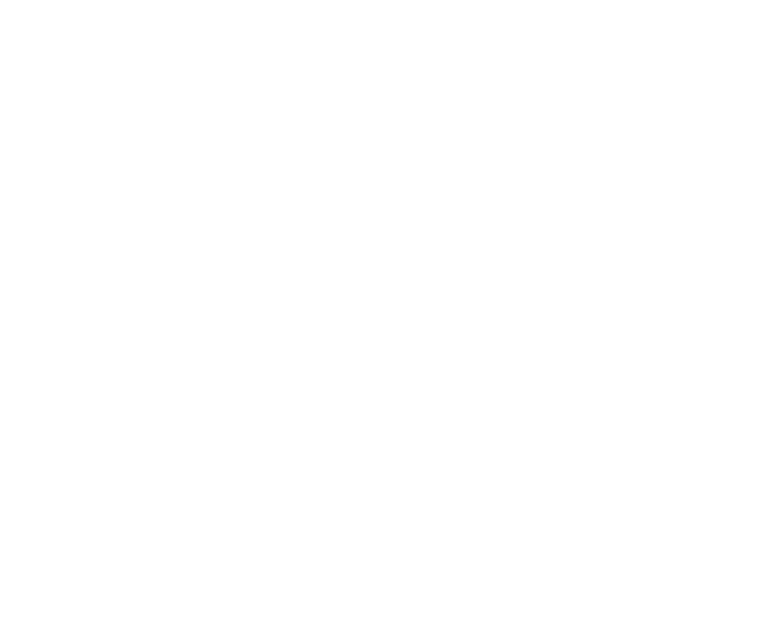

In [57]:
# Visual Python: Visualization > WordCloud
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Check the available columns in your DataFrame
print(df.columns)

# Choose a suitable column containing text data for the word cloud
# For example, if you have a column named 'Area Type', use it instead of 'Description'
text_column = 'Area Type'  # Replace with the actual column name

# Proceed with creating the word cloud
text = ' '.join(df[text_column].astype(str).tolist())
counts = Counter(text.split())
tags = counts.most_common(200)

wc = WordCloud(max_font_size=200, background_color='white', width=1000, height=800, stopwords=['rent',' area'], font_path='/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf')
cloud = wc.generate_from_frequencies(dict(tags))

plt.figure(figsize=(8, 20))
plt.imshow(cloud)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()